<a href="https://colab.research.google.com/github/cloud-vinny/Computing_Tech_Proj_Assignment/blob/main-project/Spam1_2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Independencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import dataset**

In [ ]:
# Load external dataset (ham/spam labels) dataset 2
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/2spam/spam.csv", encoding="latin-1")
# Keep useful columns
df2 = df2[['v1','v2']]
# rename fields
df2 = df2.rename(columns={'v1': 'spam', 'v2': 'text'})
# Convert labels ham/spam -> 0/1
df2['spam'] = df2['spam'].map({'ham':0, 'spam':1})
print(df2.shape)
df2.head()

(5572, 2)


,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/2spam/emails.csv")
print(df1.shape)
df1.head()

(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# **Merging datasets**

In [ ]:
# Merge with new dataset
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates
df = df.drop_duplicates(subset='text').reset_index(drop=True)

# Check final result
print("Final merged dataset shape:", df.shape)
print(df['spam'].value_counts())

# shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(20))

Final merged dataset shape: (10864, 2)
spam
0    8843
1    2021
Name: count, dtype: int64
                                                 text  spam
0                          K, want us to come by now?     0
1   Subject: reminder  stinson ,  fyi  vince  - - ...     0
2   Ok Chinese food on its way. When I get fat you...     0
3   Subject: congratulations  vince : congratulati...     0
4   Subject: security alert - confirm your nationa...     1
5   Subject: get rid of premature ejaculation and ...     1
6   Subject: alex tartakovski  as you may know , w...     0
7   Subject: re : lacima energy and weather deriva...     0
8   Subject: re : hi :  thanks vince :  could you ...     0
9   Subject: a heartwarmer : just imagine  ~ welco...     1
10  Subject: claim your free $ 1000 home depot gif...     1
11  Subject: re : brown bag  tom :  yes , we can a...     0
12  Subject: in confidence / project status  hi vi...     0
13  Subject: pleasure your women - size does matte...     1
14  Januar

In [ ]:
df.sample(20)

,text,spam
4531,Subject: contact - joao c . neves & enron dea...,0
4890,Subject: request submitted : access request fo...,0
503,Subject: re : sfa individual registrations hi...,0
6377,"Sorry sir, i will call you tomorrow. senthil....",0
6115,Subject: re : private firm schedule thanks fo...,0
6148,Esplanade lor. Where else...,0
56,Good afternoon sexy buns! How goes the job sea...,0
235,It does it on its own. Most of the time it fix...,0
733,1. Tension face 2. Smiling face 3. Waste face ...,0
2177,Huh y lei...,0


# **Data Cleaning**

In [ ]:
#lowercase all the chars
df.text = df.text.str.lower()

In [ ]:
# Clear and repeated word : "subject: " , "re :" , "fw :" , and "news :" .
df['text'] = df['text'].str.replace("subject: ", "", regex=True)
df['text'] = df['text'].str.replace("re : ", "", regex=True)
df['text'] = df['text'].str.replace("fw : ", "", regex=True)
df['text'] = df['text'].str.replace("news : ", "", regex=True)

df.sample(50)

,text,spam
8355,more then 70 great pornstars sex movles ! dowl...,1
3909,"statistica & lunch rick , we are using sas ....",0
10572,mentor / summer associate program as a remind...,0
9545,"guy, no flash me now. if you go call me, call ...",0
2410,"hmm ok, i'll stay for like an hour cos my eye ...",0
10255,e - mail and voicemail retention policy as a ...,0
4990,year end 2000 performance feedback note : you...,0
1005,"nothing much, chillin at home. any super bowl ...",0
4416,f / u to dr . kaminski @ enron from iris mack ...,0
7428,strategic management society conference our p...,0


In [ ]:
#checking if there's any missing value of both column
df.isnull().sum()

,0
text,0
spam,0


In [ ]:
#checking if there's any duplicate in text column
df["text"].duplicated().sum()

np.int64(1)

In [ ]:
# Remove the duplicate and keep the first one
df = df.drop_duplicates(keep="first")

In [ ]:
# Checking the duplicated if it's removed
df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

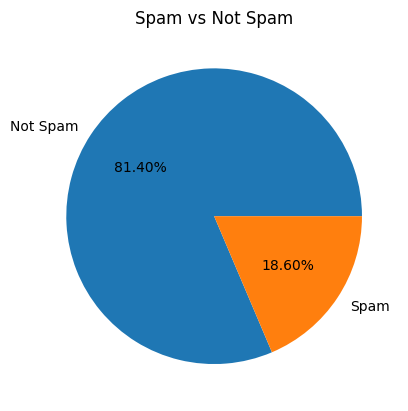

In [ ]:
counts = df['spam'].value_counts()
label_map = {1: 'Spam', 0: 'Not Spam'}
labels = [label_map[i] for i in counts.index]

plt.pie(counts,labels=labels,autopct='%0.2f%%')
plt.title('Spam vs Not Spam')
plt.show()
# result shows of imbalance df between not spam and spam

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenization
df['num_chars']=df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sen10'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,text,spam,num_chars,num_words,num_sen10
0,"k, want us to come by now?",0,26,9,1
1,"reminder stinson , fyi vince - - - - - - -...",0,2386,546,41
2,ok chinese food on its way. when i get fat you...,0,69,18,2
3,congratulations vince : congratulations on yo...,0,341,67,5
4,security alert - confirm your national credit ...,1,71,12,1


In [ ]:
df[['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,10863.000000,10863.000000,10863.000000
mean,847.874620,179.076498,11.101169
std,1652.621015,339.805110,27.507231
min,2.000000,1.000000,1.000000
25%,63.000000,15.000000,1.000000
50%,209.000000,44.000000,4.000000
75%,1025.000000,221.000000,13.000000
max,43928.000000,8471.000000,1565.000000


In [ ]:
# Not Spam
df[df['spam'] == 0 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,8842.000000,8842.000000,8842.000000
mean,829.180389,176.868469,10.601335
std,1577.224923,327.835017,28.175488
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,158.000000,37.000000,3.000000
75%,1079.000000,232.000000,12.000000
max,43928.000000,8471.000000,1565.000000


In [ ]:
# Spam
df[df['spam'] == 1 ][['num_chars', 'num_words', 'num_sen10']].describe()

,num_chars,num_words,num_sen10
count,2021.000000,2021.000000,2021.000000
mean,929.663038,188.736764,13.287976
std,1946.817412,387.798355,24.254574
min,9.000000,2.000000,1.000000
25%,156.000000,31.000000,3.000000
50%,403.000000,80.000000,7.000000
75%,915.000000,202.000000,13.000000
max,28418.000000,6128.000000,438.000000


<Axes: xlabel='num_chars', ylabel='Count'>

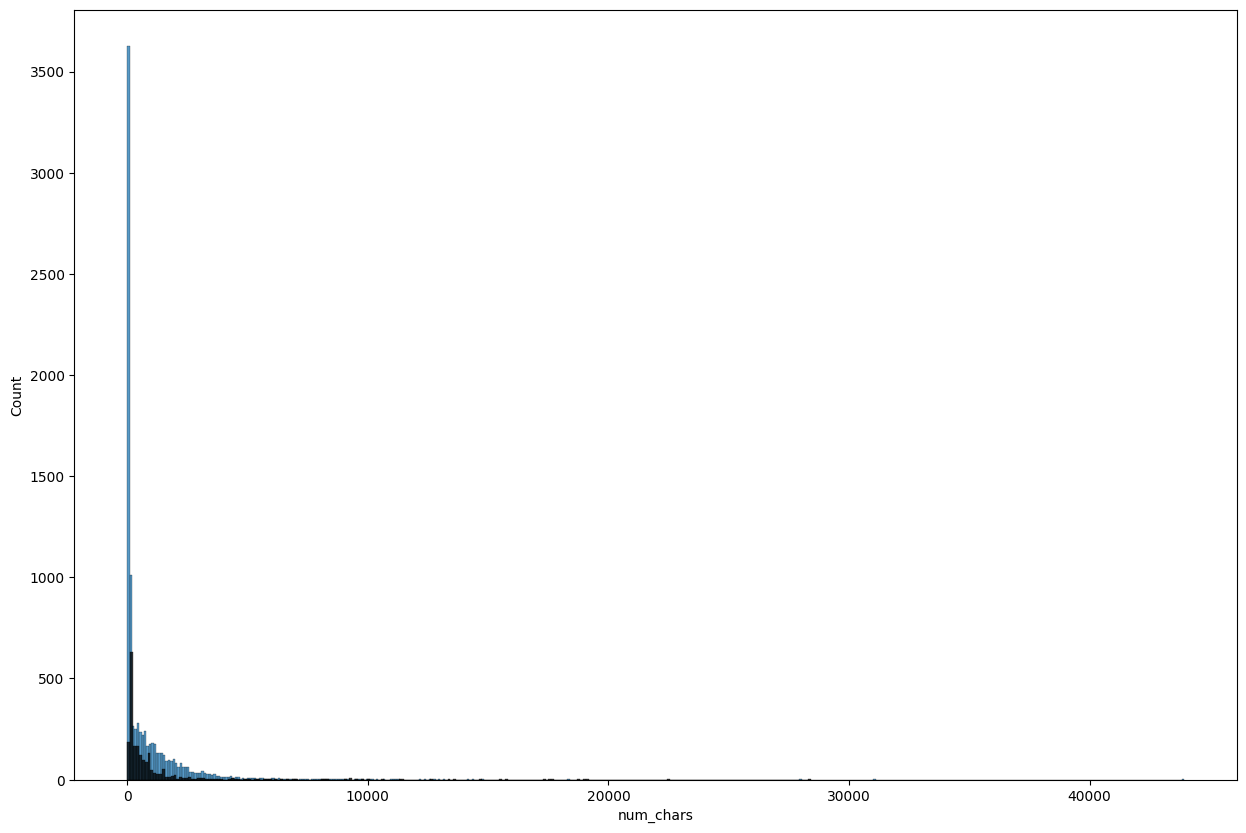

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="black")

<Axes: xlabel='num_chars', ylabel='Count'>

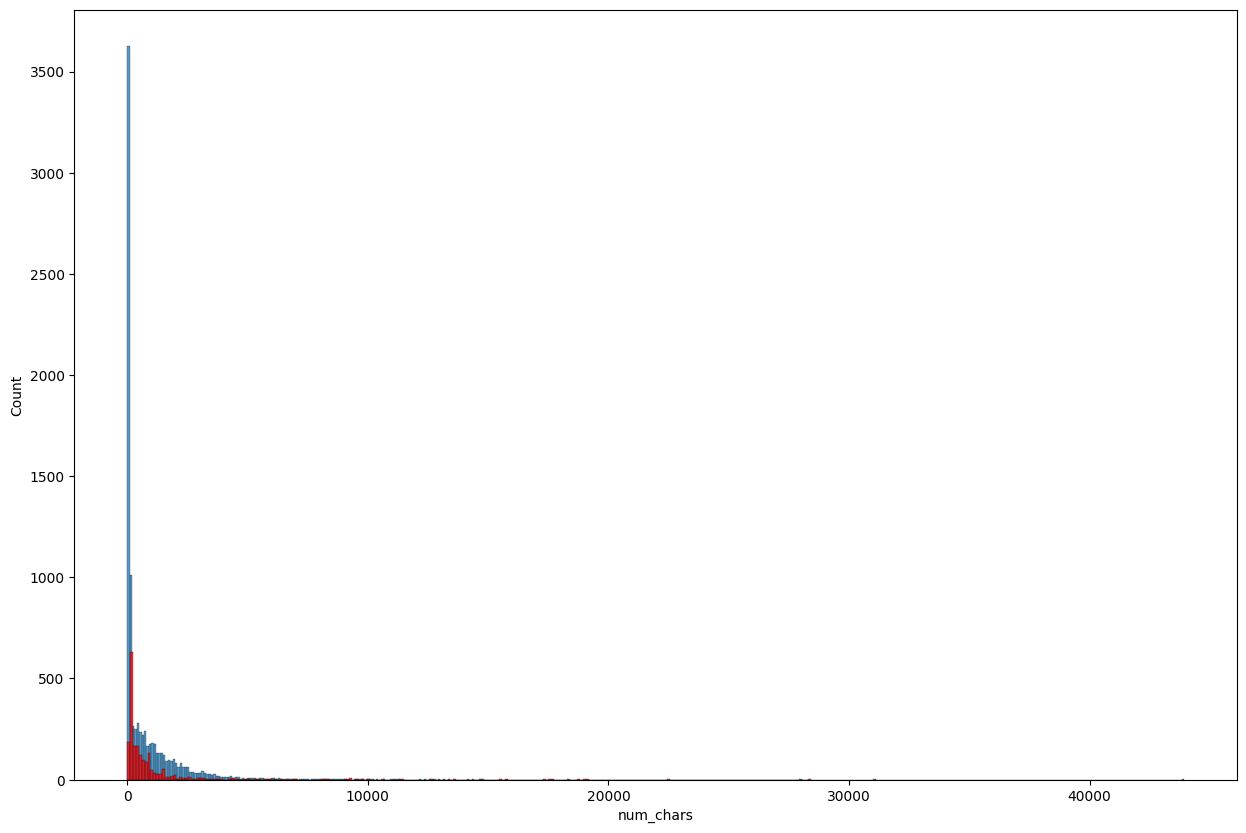

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_chars'])
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")

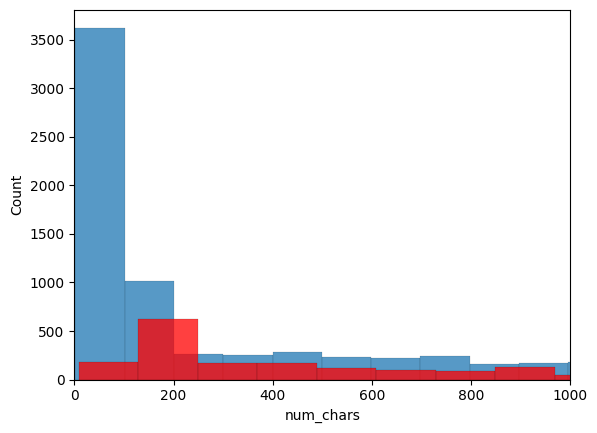

In [ ]:
# Spam and snot spam zoom in visualization
sns.histplot(df[df['spam'] == 0]['num_chars'])

# red color = spam
sns.histplot(df[df['spam'] == 1]['num_chars'], color="red")
plt.xlim(0, 1000)   # zoom in
plt.show()


<Axes: xlabel='num_sen10', ylabel='Count'>

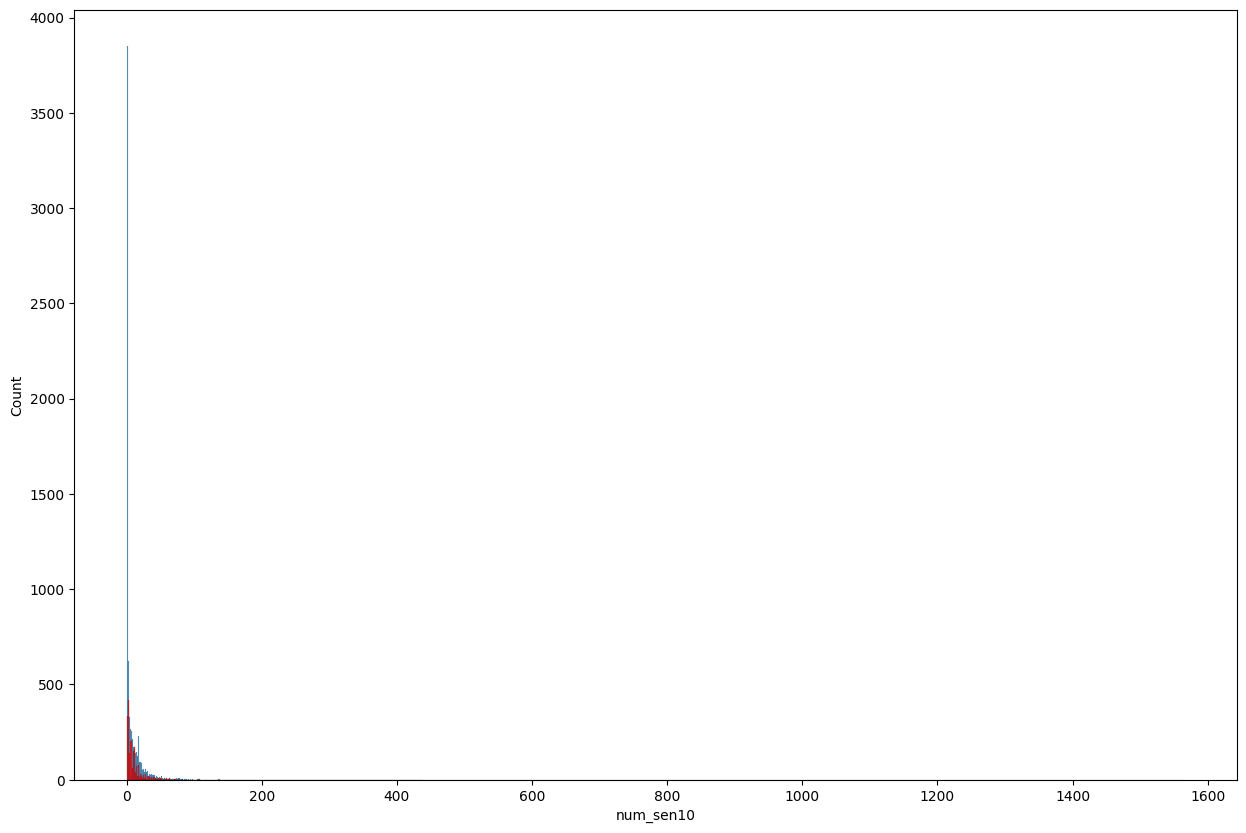

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['spam'] == 0]['num_sen10'])
sns.histplot(df[df['spam'] == 1]['num_sen10'], color="red")

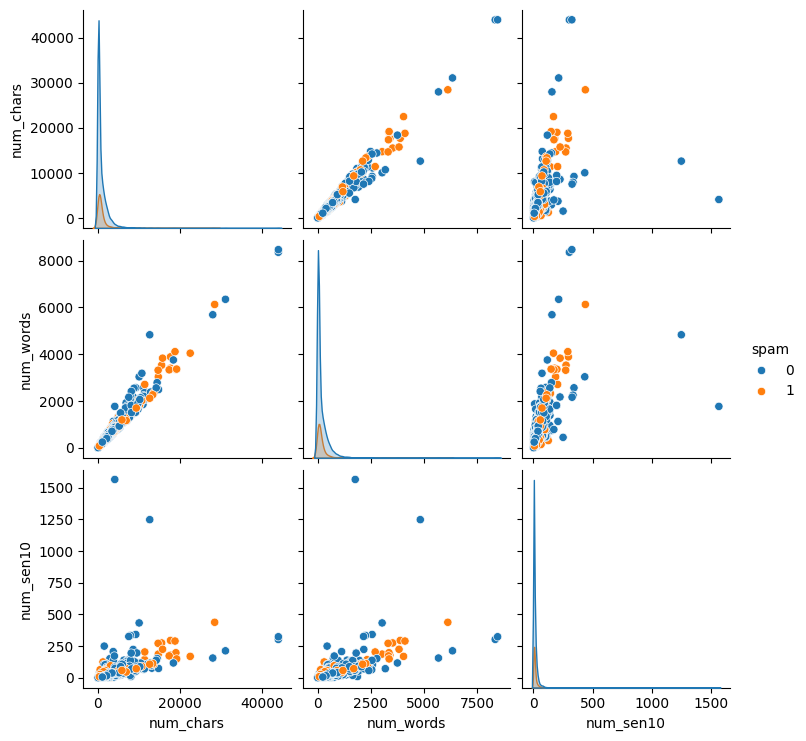

In [ ]:
sns.pairplot(df,hue='spam')

In [ ]:
# Correlation
corr = df.select_dtypes(include=['number']).corr()
print(corr)

               spam  num_chars  num_words  num_sen10
spam       1.000000   0.023662   0.013592   0.038009
num_chars  0.023662   1.000000   0.988856   0.647457
num_words  0.013592   0.988856   1.000000   0.702594
num_sen10  0.038009   0.647457   0.702594   1.000000


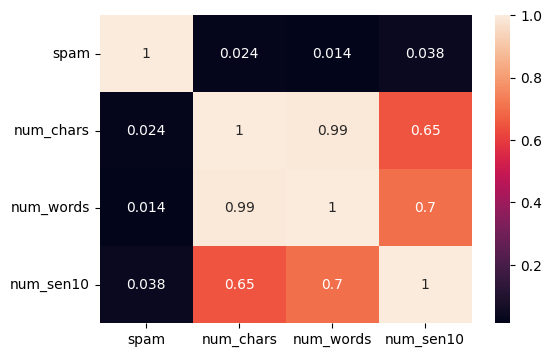

In [ ]:
# Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)
plt.show()

# **Data Preprocessing**


In [ ]:
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
#Stemming method
ps = PorterStemmer()
ps.stem('cooking')

'cook'

**Text Transform Function for Input**

In [ ]:
def text_transform(text):
  text = text.lower() #lowercase
  text = nltk.word_tokenize(text) #tokenize

  # remove special chars & stopwords & punctuation & stemming
  b = []
  for a in text:
    if a.isalnum() and a not in stopwords.words('english') and a not in string.punctuation:
      b.append(ps.stem(a))

  return " ".join(b)

In [ ]:
# text = df['text'][500]
text = "I loved to play basketball and watching anime. How about you? bro"
text_transform(text)

'love play basketbal watch anim bro'

In [ ]:
df["preprocessed_text"] = df['text'].apply(text_transform)
df.head(10)

,text,spam,num_chars,num_words,num_sen10,preprocessed_text
0,"k, want us to come by now?",0,26,9,1,k want us come
1,"reminder stinson , fyi vince - - - - - - -...",0,2386,546,41,remind stinson fyi vinc forward vinc j kaminsk...
2,ok chinese food on its way. when i get fat you...,0,69,18,2,ok chines food way get fat pay lipo
3,congratulations vince : congratulations on yo...,0,341,67,5,congratul vinc congratul promot know well dese...
4,security alert - confirm your national credit ...,1,71,12,1,secur alert confirm nation credit union inform
5,get rid of premature ejaculation and last long...,1,374,81,8,get rid prematur ejacul last longer new peni e...
6,"alex tartakovski as you may know , we are try...",0,3948,776,33,alex tartakovski may know tri schedul intervie...
7,lacima energy and weather derivatives courses ...,0,1595,328,35,lacima energi weather deriv cours clewlow stri...
8,hi : thanks vince : could you give me mike r...,0,1076,223,12,hi thank vinc could give mike robert contact i...
9,a heartwarmer : just imagine ~ welcome to hea...,1,11352,2328,143,heartwarm imagin welcom heartwarm http www hea...


In [ ]:
# Cleaned again for the column['preprocessed_text']

df = df.drop_duplicates(subset='preprocessed_text', keep='first')
df['preprocessed_text'].duplicated().sum()
df.dropna(inplace=True)
df['preprocessed_text'].isnull().sum()

/tmp/ipython-input-2116524652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


np.int64(0)

**Save the Cleaned and Preprocessed Dataset**

In [ ]:
# Double check if null or duplicated
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [ ]:
df_clean = df.copy()

In [ ]:
#save the current dataset
df_clean.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/cleaned_dataset.csv", index=False)

**Spam & Non Spam Text Most_Common_Count and Visualize**

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_spam/cleaned_dataset.csv")

In [ ]:
from wordcloud import WordCloud

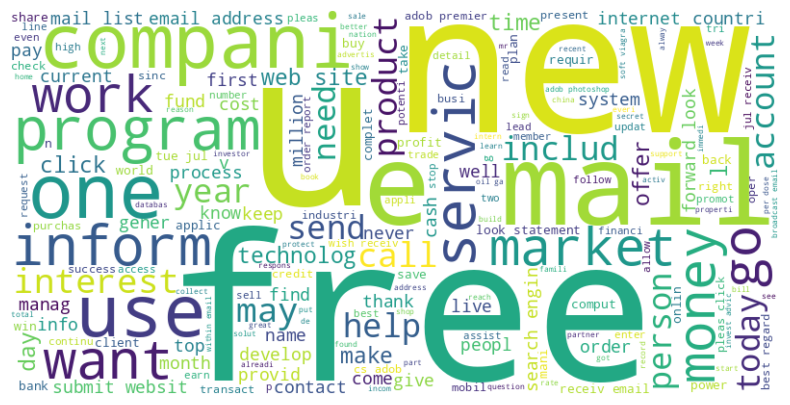

In [ ]:
# Generate word cloud only for spam messages
wc = WordCloud(width=800, height=400, background_color='white')
spam_wc = wc.generate(df[df['spam'] == 1]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

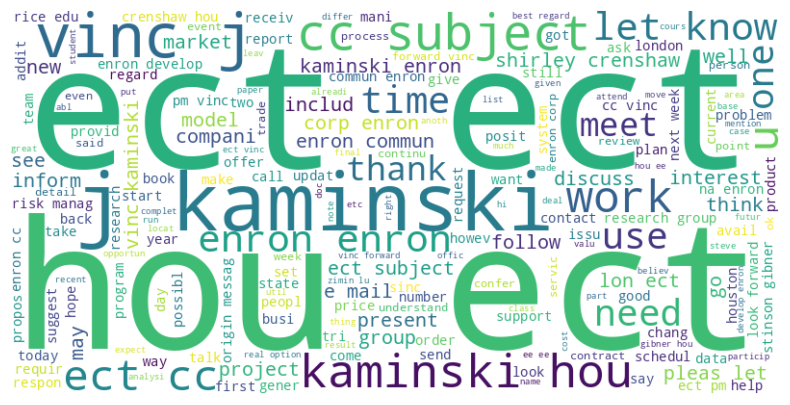

In [ ]:
# Generate word cloud only for non spam messages
non_spam_wc = wc.generate(df[df['spam'] == 0]['preprocessed_text'].str.cat(sep=" "))

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['spam'] == 1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

182513

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,compani,1067
1,com,999
2,1,978
3,mail,917
4,busi,896
5,email,866
6,inform,827
7,free,786
8,get,766
9,2,761


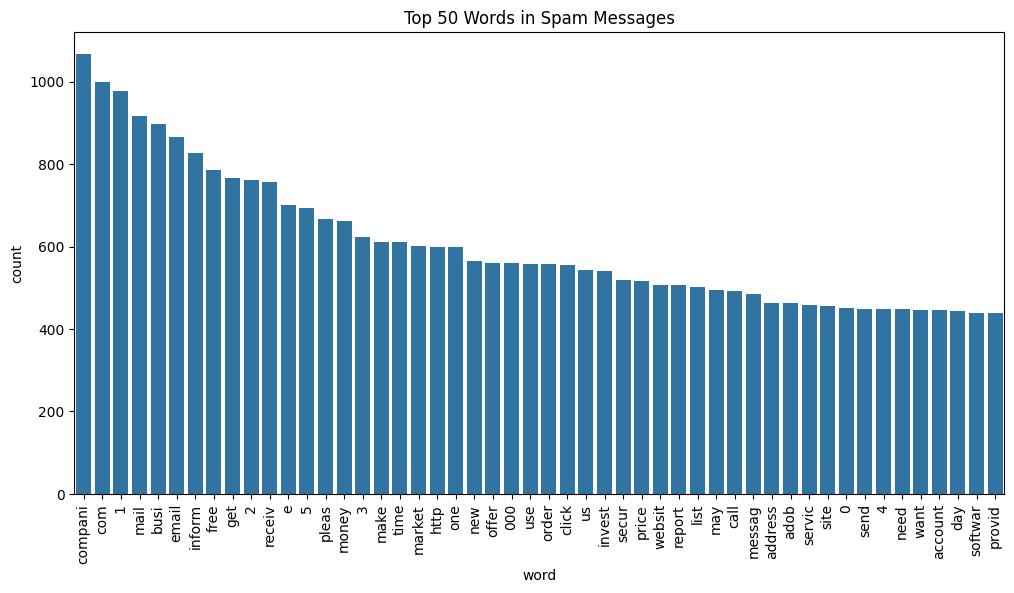

In [ ]:
spam_word_counts = Counter(spam_corpus).most_common(50)
df_swc = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_swc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Spam Messages")
plt.show()

In [ ]:
df[df['spam'] == 0]['preprocessed_text']

,preprocessed_text
0,k want us come
1,remind stinson fyi vinc forward vinc j kaminsk...
2,ok chines food way get fat pay lipo
3,congratul vinc congratul promot know well dese...
6,alex tartakovski may know tri schedul intervie...
...,...
10857,grant anjam per converst vinc kaminski anjam p...
10858,u rememb old commerci
10859,encourag would appreci ga power trade organ tr...
10861,will go aptitud class


In [ ]:
non_spam_corpus = []
for msg in df[df['spam'] == 0]['preprocessed_text'].tolist():
  if isinstance(msg, str): # Check if the message is a string
    for word in msg.split():
      non_spam_corpus.append(word)

len(non_spam_corpus)

702447

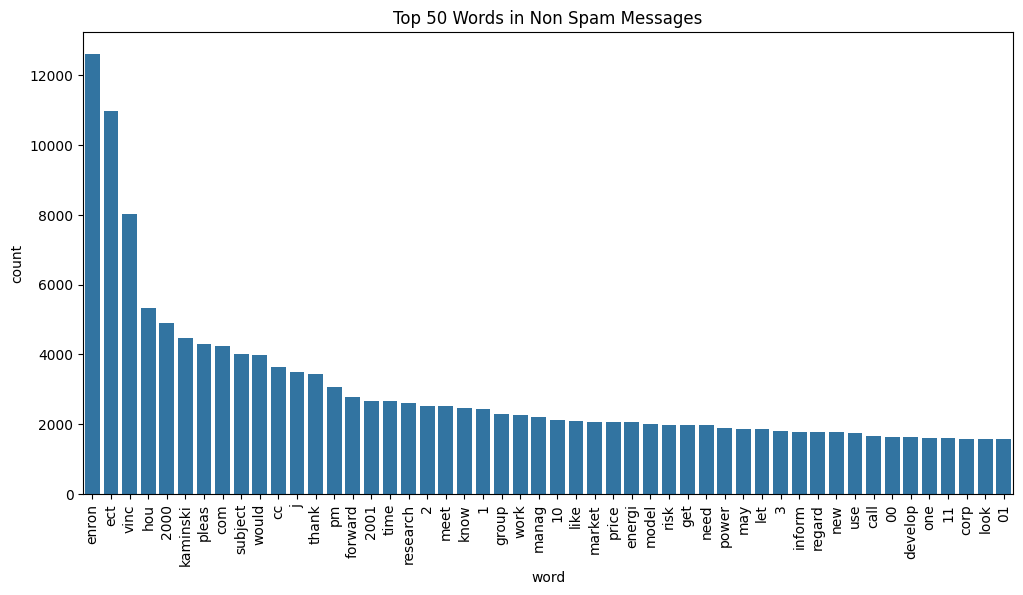

In [ ]:
n_spam_word_counts = Counter(non_spam_corpus).most_common(50)
df_nswc = pd.DataFrame(n_spam_word_counts, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_nswc)
plt.xticks(rotation='vertical')
plt.title("Top 50 Words in Non Spam Messages")
plt.show()

# **Model Building**

**Indenpendencies for Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#dataset spliting
from sklearn.model_selection import train_test_split
#Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
#Evvaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from scipy.stats import mode
from scipy.optimize import linear_sum_assignment
# Balance Data method
from imblearn.over_sampling import RandomOverSampler

In [ ]:
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X = tfidf.fit_transform(df['preprocessed_text']).toarray()

ros = RandomOverSampler(random_state=2)

In [ ]:
X.shape

(10598, 3000)

In [ ]:
y = df['spam'].values
y

array([0, 0, 0, ..., 0, 1, 0])

***Spliting Train = 75% and Test = 25%***

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.25, random_state=42)
#Balance the dataset
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# ***Training Part***

**MultinomialNB**

In [ ]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_bal, y_train_bal)

MultinomialNB(alpha=0.1)

**LogisticRegression**

In [ ]:
clf = LogisticRegression(max_iter=300, class_weight='balanced', n_jobs=None)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=300)

**K-Means**

In [ ]:
kmeans= KMeans(n_clusters=2,random_state=2)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=2)

# **Evaluation**

In [ ]:
# MultinomialNB

y_pred = mnb.predict(X_test)
y_prob = mnb.predict_proba(X_test)[:,1]   # probability for spam

# Evaluate
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1-Score      :", f1_score(y_test, y_pred))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy      : 0.9022641509433962
Precision     : 0.6662049861495845
Recall        : 0.9639278557114228
F1-Score      : 0.7878787878787878
ROC-AUC       : 0.9877817000807753
Confusion Matrix:
 [[1910  241]
 [  18  481]]

Detailed Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      2151
           1       0.67      0.96      0.79       499

    accuracy                           0.90      2650
   macro avg       0.83      0.93      0.86      2650
weighted avg       0.93      0.90      0.91      2650



In [ ]:
# Logistic Regression

y_pred2 = clf.predict(X_test)
y_prob2 = clf.predict_proba(X_test)[:,1]

# Evaluate (same metrics)
print("Accuracy      :", accuracy_score(y_test, y_pred2))
print("Precision     :", precision_score(y_test, y_pred2))
print("Recall        :", recall_score(y_test, y_pred2))
print("F1-Score      :", f1_score(y_test, y_pred2))
print("ROC-AUC       :", roc_auc_score(y_test, y_prob2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy      : 0.9667924528301887
Precision     : 0.8914285714285715
Recall        : 0.9378757515030061
F1-Score      : 0.9140625
ROC-AUC       : 0.9899692457905117
Confusion Matrix:
 [[2094   57]
 [  31  468]]


In [ ]:
# K-Means Clustering

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['preprocessed_text'])

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

y_true = df['spam'].astype(int).values          # assumes ground-truth in 'spam'
y_cluster = kmeans.labels_

# Use Hungarian algorithm to best match clusters to classes
cont = pd.crosstab(y_true, y_cluster)
row_ind, col_ind = linear_sum_assignment(-cont.values)     # maximise matches
cluster_map = {cont.columns[j]: cont.index[i] for i, j in zip(row_ind, col_ind)}

# Apply mapping to get predicted class labels
y_pred = np.vectorize(cluster_map.get)(y_cluster)

print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=3))
print("Accuracy:", accuracy_score(y_true, y_pred))


Confusion Matrix:
 [[6747 1860]
 [1991    0]]
              precision    recall  f1-score   support

           0      0.772     0.784     0.778      8607
           1      0.000     0.000     0.000      1991

    accuracy                          0.637     10598
   macro avg      0.386     0.392     0.389     10598
weighted avg      0.627     0.637     0.632     10598

Accuracy: 0.6366295527458011


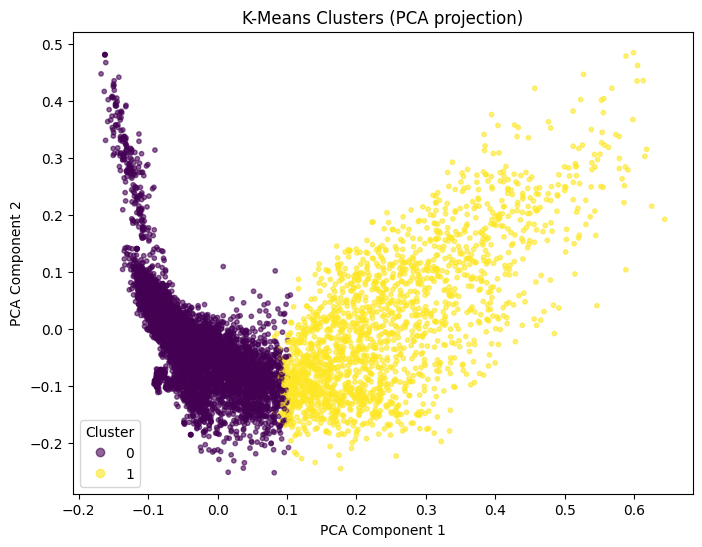

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X.toarray())      # X is the TF-IDF matrix

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_cluster,
    cmap='viridis', alpha=0.6, s=10
)
plt.title("K-Means Clusters (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

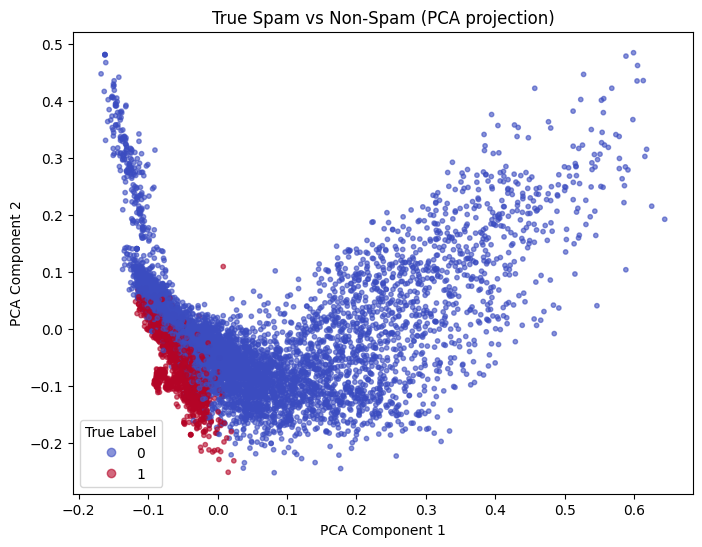

In [ ]:
plt.figure(figsize=(8,6))
scatter2 = plt.scatter(
    X_2d[:,0], X_2d[:,1],
    c=y_true,                   # colour by actual labels
    cmap='coolwarm', alpha=0.6, s=10
)
plt.title("True Spam vs Non-Spam (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter2.legend_elements(), title="True Label")
plt.show()

**The Best Performance among three algorithm**  
> **CLF (Logistic Regression)**  

Therefore, I'm gonna use **CLF** for the test case.


***TESTING MODEL PREDICTION***



In [ ]:
num = 1020
mess = df['text'][num]
print(f'Message: "{mess}"')

# Apply your preprocessing
mess = text_transform(mess)

# Convert to vector (same as training!)
mess_vec = tfidf.transform([mess])

#actual
actual = df['spam'][num]
if actual == 1:
  print("Actual: SPAM " )
else:
  print("Prediction: NON SPAM ")


# Predict
prediction = clf.predict(mess_vec)

if prediction == 1:
  print("Prediction: SPAM " )
else:
  print("Prediction: NON SPAM ")


Message: "yeah like if it goes like it did with my friends imma flip my shit in like half an hour"
Prediction: NON SPAM 
Prediction: NON SPAM 


**TestCase Example1**

In [ ]:
# Example test message
mess = "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
print(f'Message: \"{mess}\"')

# Apply preprocessing
mess_clean = text_transform(mess)

# Vectorise using the same fitted TF-IDF
mess_vec = tfidf.transform([mess_clean])

prediction = clf.predict(mess_vec)[0]

# Predict probability for each class
proba = clf.predict_proba(mess_vec)[0]   # returns array like [P(non-spam), P(spam)]

print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")

# Final label
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Congratulations! You have WON a $500 gift card. Click here to claim your prize now!"
Probability of NON-SPAM: 3.22%
Probability of SPAM    : 96.78%
Predicted label: SPAM


**TestCase Example2**

In [ ]:
mess = "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."

print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Hi John, I’ll meet you at the cafe at 3pm tomorrow for our project discussion."
Probability of NON-SPAM: 98.31%
Probability of SPAM    : 1.69%
Predicted label: NON-SPAM


**TestCase Example3**

In [ ]:
test_messages = [
    "You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.",
    "Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.",
    "Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!",
    "Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.",
    "URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension."
]

# Create a list to store the cleaned messages
mess_clean = []

for i, msg in enumerate(test_messages):
    print(f"\nMessage {i+1}: {msg}")
    cleaned = text_transform(msg)
    mess_clean.append(cleaned)

    vec = tfidf.transform([cleaned])
    proba = clf.predict_proba(vec)[0]
    pred = clf.predict(vec)[0]

    print(f"Probability NON-SPAM: {proba[0]*100:.2f}%")
    print(f"Probability SPAM    : {proba[1]*100:.2f}%")
    print("Predicted Label:", "SPAM" if pred == 1 else "NON-SPAM")



Message 1: You’ve been selected for a limited-time loan offer! Apply today and get cash instantly — click the link now.
Probability NON-SPAM: 6.67%
Probability SPAM    : 93.33%
Predicted Label: SPAM

Message 2: Hey Sarah, just checking if you’re free for lunch tomorrow at the new Italian restaurant.
Probability NON-SPAM: 75.23%
Probability SPAM    : 24.77%
Predicted Label: NON-SPAM

Message 3: Congratulations 🎉! You’re our lucky winner of a free iPhone 15. Claim your prize before midnight!
Probability NON-SPAM: 7.29%
Probability SPAM    : 92.71%
Predicted Label: SPAM

Message 4: Meeting reminder: Don’t forget the team call at 10 AM tomorrow. Please join the Zoom link on time.
Probability NON-SPAM: 78.02%
Probability SPAM    : 21.98%
Predicted Label: NON-SPAM

Message 5: URGENT: Your bank account has been locked. Verify your details immediately to avoid suspension.
Probability NON-SPAM: 28.13%
Probability SPAM    : 71.87%
Predicted Label: SPAM


**User INPUT to Check Spam Detection**

Replace the text in ***mess variable*** of your choice to check the spam and non spam

In [ ]:
#=================================================================

#Replace your text here to check
mess = "Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!"

#=================================================================
print(f'Message: \"{mess}\"')
mess_clean = text_transform(mess)
mess_vec = tfidf.transform([mess_clean])
prediction = clf.predict(mess_vec)[0]
proba = clf.predict_proba(mess_vec)[0]
print(f"Probability of NON-SPAM: {proba[0]*100:.2f}%")
print(f"Probability of SPAM    : {proba[1]*100:.2f}%")
if prediction == 1:
    print("Predicted label: SPAM")
else:
    print("Predicted label: NON-SPAM")

Message: "Congratulations! You have won $1,000,000 in our international lottery! To claim your prize, send us your bank details and personal information immediately. Limited time offer! Click here now!"
Probability of NON-SPAM: 3.23%
Probability of SPAM    : 96.77%
Predicted label: SPAM
